# CONEXIONES E IMPORTACIONES

In [2]:
# Para tratamiento de datos
import pandas as pd
import numpy as np
import re #para llamar a Expresiones Regulares y estandarizar el nombre de las columnas.

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# Trabajar con el sistema operativo y variables de entorno
import os 
from dotenv import load_dotenv

# Conexión con MySQL
import mysql.connector
from mysql.connector import Error

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

df_hr = pd.read_csv("./datasets/hr.csv")

## Columnas del Dataset

| Columna | Descripción |
| :--- | :--- |
| **Age** | Edad del empleado. |
| **Attrition** | Indica si el empleado dejó la empresa (**Yes/No**). |
| **BusinessTravel** | Frecuencia de viajes laborales (ej. Travel_Rarely, Travel_Frequently). |
| **DailyRate** | Tarifa diaria estimada basada en el salario. |
| **Department** | Departamento en el que trabaja el empleado. |
| **DistanceFromHome** | Distancia desde el hogar hasta el lugar de trabajo. |
| **Education** | Nivel educativo representado en una escala numérica. |
| **EducationField** | Campo o área de estudios del empleado. |
| **EmployeeCount** | Valor constante (normalmente 1), indica un empleado por registro. |
| **EmployeeNumber** | Identificador único del empleado. |
| **EnvironmentSatisfaction** | Nivel de satisfacción con el entorno laboral. |
| **Gender** | Género del empleado. |
| **HourlyRate** | Tarifa por hora estimada. |
| **JobInvolvement** | Nivel de implicación del empleado en su trabajo. |
| **JobLevel** | Nivel jerárquico del puesto. |
| **JobRole** | Rol o puesto específico del empleado. |
| **JobSatisfaction** | Nivel de satisfacción con el trabajo. |
| **MaritalStatus** | Estado civil del empleado. |
| **MonthlyIncome** | Ingreso mensual estimado. |
| **MonthlyRate** | Tarifa mensual estimada. |
| **NumCompaniesWorked** | Número de empresas en las que ha trabajado previamente. |
| **Over18** | Indica si el empleado es mayor de 18 años. |
| **OverTime** | Indica si el empleado realiza horas extra (**Yes/No**). |
| **PercentSalaryHike** | Porcentaje de incremento salarial. |
| **PerformanceRating** | Evaluación del desempeño del empleado. |
| **RelationshipSatisfaction** | Nivel de satisfacción con las relaciones laborales. |
| **StandardHours** | Horas estándar de trabajo. |
| **StockOptionLevel** | Nivel de opciones sobre acciones asignadas. |
| **TotalWorkingYears** | Total de años de experiencia laboral. |
| **TrainingTimesLastYear** | Número de formaciones recibidas en el último año. |
| **WorkLifeBalance** | Nivel de equilibrio entre vida personal y laboral. |
| **YearsAtCompany** | Años que el empleado lleva en la empresa. |
| **YearsInCurrentRole** | Años en el rol actual. |
| **YearsSinceLastPromotion** | Años transcurridos desde la última promoción. |
| **YearsWithCurrManager** | Años trabajando con el gerente actual. |

# EDA

Fase 1: Análisis Exploratorio de Datos(EDA).

Antes de llevar a cabo el proyecto es crucial comprender mejor el conjunto de datos y sus características. Para ello deberás hacer un análisis exploratorio detallado del conjunto de datos para familiarizarte con ellos y entender que información tenemos.

1. ✔ - Estandarizar nombre columnas
2. ✔ - eliminar duplicados (EmployeeNumber)
3. ✔ - borrar "EmployeeCount"
4. ✔ - revisar tipo datos
5. "Education" + "EducationField" - > revisar
6. ✔ - valorar cambiar los nombres de valores en según que columnas ("RelationshipSatisfaction", "PerformanceRating", )
7. Revisar nulos ("StandardHours")
8. ✔ - estandarizar columna "JobRole"


In [3]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0


In [4]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1401.0,36.944325,9.105009,18.0,30.00,36.0,43.00,60.0
DailyRate,1474.0,802.702171,403.539530,102.0,465.00,803.0,1157.00,1499.0
DistanceFromHome,1474.0,9.199457,8.104266,1.0,2.00,7.0,14.00,29.0
Education,1474.0,2.911126,1.024267,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1474.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1474.0,1024.471506,602.421193,1.0,488.75,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1474.0,2.723881,1.093280,1.0,2.00,3.0,4.00,4.0
HourlyRate,1474.0,65.887381,20.310444,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1474.0,2.729986,0.712861,1.0,2.00,3.0,3.00,4.0
JobLevel,1474.0,2.063772,1.106055,1.0,1.00,2.0,3.00,5.0


In [5]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1401 non-null   float64
 1   Attrition                 1474 non-null   object 
 2   BusinessTravel            1357 non-null   object 
 3   DailyRate                 1474 non-null   int64  
 4   Department                1445 non-null   object 
 5   DistanceFromHome          1474 non-null   int64  
 6   Education                 1474 non-null   int64  
 7   EducationField            1416 non-null   object 
 8   EmployeeCount             1474 non-null   int64  
 9   EmployeeNumber            1474 non-null   int64  
 10  EnvironmentSatisfaction   1474 non-null   int64  
 11  Gender                    1474 non-null   object 
 12  HourlyRate                1474 non-null   int64  
 13  JobInvolvement            1474 non-null   int64  
 14  JobLevel

## Estandarización columnas

In [6]:
# Hay valores numéricos de grados de interpretación, los actualizamos para que sea más visual.
# Usamos una función para las variables que muestran los mismos niveles y para las que tienen valores únicos respecto al resto de columnas las hacemos 1:1

def cat_low_veryhigh(col):
    niveles = {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"}
    df_hr[col] = df_hr[col].replace(niveles)

In [7]:
columnas_a_cambiar = ["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "RelationshipSatisfaction"]

cat_low_veryhigh(columnas_a_cambiar)

In [8]:
for fi in df_hr["WorkLifeBalance"]:
        niveles = {
              1: "Bad",
              2: "Good",
              3: "Better",
              4: "Best"  
        }
        df_hr["WorkLifeBalance"] = df_hr["WorkLifeBalance"].replace(niveles)

In [9]:
for fi in df_hr["Education"]:
        niveles = {
              1: "Below College",
              2: "College",
              3: "Bachelor",
              4: "Master",
              5: "Doctor"
        }
        df_hr["Education"] = df_hr["Education"].replace(niveles)

In [10]:
for fi in df_hr["PerformanceRating"]:
        niveles = {
              1: "Low",
              2: "Good",
              3: "Excellent",
              4: "Outstanding"
        }
        df_hr["PerformanceRating"] = df_hr["PerformanceRating"].replace(niveles)

In [11]:
df_hr["MonthlyIncome"].unique()

array([5993., 5130., 2090., ..., 9991., 5390., 4404.])

In [12]:
def corregir_enteros_disfrazados(df):
    cols_float = df.select_dtypes(include=['float64', 'float']).columns
    
    for col in cols_float:
        # Solo comprobamos los valores NO nulos
        if not (df[col].dropna() % 1 != 0).any():
            df[col] = df[col].astype('Int64')
            print(f"Columna '{col}' convertida a entero.")

In [13]:
corregir_enteros_disfrazados(df_hr)

Columna 'Age' convertida a entero.
Columna 'MonthlyIncome' convertida a entero.
Columna 'StandardHours' convertida a entero.
Columna 'TrainingTimesLastYear' convertida a entero.
Columna 'YearsWithCurrManager' convertida a entero.


In [14]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,sALES eXECUTIVE,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,rESEARCH sCIENTIST,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,<NA>,1,10,3,Better,10,7,1,7


In [15]:
def estandarizar_todo(df):
    # 1. Limpiar los nombres de las COLUMNAS
    # Pasamos de 'BusinessTravel' -> 'Business Travel' -> 'business_travel'
    import re
    
    def limpiar_nombre(nombre):
        # Insertar espacio antes de mayúsculas (para separar PascalCase)
        nombre = re.sub(r'(?<!^)(?=[A-Z])', ' ', nombre)
        # Limpiar guiones bajos previos, pasar a minúsculas y quitar espacios extra
        return nombre.replace('_', ' ').lower().strip().replace(' ', '_')

    df.columns = [limpiar_nombre(col) for col in df.columns]

    # 2. Limpiar el CONTENIDO de las filas (solo columnas de texto)
    cols_texto = df.select_dtypes(include=['object']).columns
    
    for col in cols_texto:
        df[col] = (df[col]
                   .str.replace("_", " ", regex=False)
                   .str.title()
                   .str.strip())
    
    return df

# Aplicar al DF
df_hr = estandarizar_todo(df_hr)

In [16]:
# Localizamos errata en la columna de Marital Status, y se corrige usando .loc

df_hr.loc[df_hr['marital_status'] == 'Marreid', 'marital_status'] = 'Married'

## Nulos

In [17]:
df_hr.isnull().sum() 

age                            73
attrition                       0
business_travel               117
daily_rate                      0
department                     29
distance_from_home              0
education                       0
education_field                58
employee_count                  0
employee_number                 0
environment_satisfaction        0
gender                          0
hourly_rate                     0
job_involvement                 0
job_level                       0
job_role                        0
job_satisfaction               29
marital_status                132
monthly_income                 14
monthly_rate                    0
num_companies_worked            0
over18                          0
over_time                      44
percent_salary_hike             0
performance_rating              0
relationship_satisfaction       0
standard_hours                164
stock_option_level              0
total_working_years             0
training_times

In [18]:
df_hr.isna().sum()/df_hr.shape[0]*100

age                            4.952510
attrition                      0.000000
business_travel                7.937585
daily_rate                     0.000000
department                     1.967436
distance_from_home             0.000000
education                      0.000000
education_field                3.934871
employee_count                 0.000000
employee_number                0.000000
environment_satisfaction       0.000000
gender                         0.000000
hourly_rate                    0.000000
job_involvement                0.000000
job_level                      0.000000
job_role                       0.000000
job_satisfaction               1.967436
marital_status                 8.955224
monthly_income                 0.949796
monthly_rate                   0.000000
num_companies_worked           0.000000
over18                         0.000000
over_time                      2.985075
percent_salary_hike            0.000000
performance_rating             0.000000


In [19]:
df_hr["years_with_curr_manager"] = df_hr["years_with_curr_manager"].fillna(df_hr["years_with_curr_manager"].median())
df_hr["standard_hours"] = df_hr["standard_hours"].fillna(df_hr["standard_hours"].median())


In [20]:
#confirmamos cambios en "years_with_curr_manager" y "standard_hours"
df_hr.isna().sum()/df_hr.shape[0]*100

age                           4.952510
attrition                     0.000000
business_travel               7.937585
daily_rate                    0.000000
department                    1.967436
distance_from_home            0.000000
education                     0.000000
education_field               3.934871
employee_count                0.000000
employee_number               0.000000
environment_satisfaction      0.000000
gender                        0.000000
hourly_rate                   0.000000
job_involvement               0.000000
job_level                     0.000000
job_role                      0.000000
job_satisfaction              1.967436
marital_status                8.955224
monthly_income                0.949796
monthly_rate                  0.000000
num_companies_worked          0.000000
over18                        0.000000
over_time                     2.985075
percent_salary_hike           0.000000
performance_rating            0.000000
relationship_satisfaction

## Duplicados

In [21]:
# Se localizan 4 duplicados, resolveremos más adelante de qué se tratan y se valorarán borrarlos.
df_hr.duplicated().sum()

4

In [22]:
duplicados_por_columna = df_hr.apply(lambda x: x.duplicated().sum())

print(duplicados_por_columna)

age                           1430
attrition                     1472
business_travel               1470
daily_rate                     588
department                    1470
distance_from_home            1445
education                     1469
education_field               1467
employee_count                1473
employee_number                  4
environment_satisfaction      1470
gender                        1472
hourly_rate                   1403
job_involvement               1470
job_level                     1469
job_role                      1465
job_satisfaction              1469
marital_status                1470
monthly_income                 137
monthly_rate                    47
num_companies_worked          1464
over18                        1473
over_time                     1471
percent_salary_hike           1459
performance_rating            1472
relationship_satisfaction     1470
standard_hours                1473
stock_option_level            1470
total_working_years 

In [23]:
#Localizamos que los duplicados se encuentran en número de empleado, lo cual es muy importante subsanar.
df_hr["employee_number"].duplicated().value_counts()

employee_number
False    1470
True        4
Name: count, dtype: int64

In [24]:
# Creamos un nuevo DataFrame solo con las filas donde el ID de empleado está repetido
duplicados_id = df_hr[df_hr.duplicated(subset=['employee_number'], keep=False)]

# Ordenamos por esa columna para ver los repetidos uno al lado del otro
duplicados_id = duplicados_id.sort_values(by='employee_number')

duplicados_id

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
67,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
1473,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
184,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
1471,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
1041,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1470,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1222,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0
1472,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0


In [25]:
# Se localizan duplicados de 4 empleados por número de empleado, por lo que los borramos manteniendo el primero.
# Las líneas se encuentran totalmente repetidas, por lo que podemos borrarlas sin problema.

df_hr.drop_duplicates(subset = ['employee_number'], inplace = True)

## Eliminación columnas

In [26]:
# Creamos una función de borrado de columnas, para poder reutilizar en caso de que sea necesario más adelante.

def eliminar_columnas(col):
    df_hr.drop(col, axis=1, inplace= True)


In [27]:
#todos tienen el mismo valor, no aporta información real, por lo que procedemos a borrarla.

df_hr["employee_count"].unique()

array([1], dtype=int64)

In [28]:
columnas_a_eliminar = ["standard_hours", "employee_count", "over18"]
eliminar_columnas(columnas_a_eliminar)

In [29]:
df_hr

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel Rarely,1102,Sales,1,College,Life Sciences,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,College,Other,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,Below College,Medical,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel Frequently,884,Research & Development,23,College,Medical,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8


In [30]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1397 non-null   Int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1353 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1441 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   object
 7   education_field             1412 non-null   object
 8   employee_number             1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   object
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   object
 13  job_level                   1470 non-null   int64 
 1

In [31]:
df_final = df_hr.copy()

In [32]:
# Guardar datasets procesados 
df_final.to_csv('./datasets/df_final.csv', index=False)
print("✅ Guardados:")
print("- df_final.csv")

✅ Guardados:
- df_final.csv


# Conexión e inserción en MySQL

In [33]:
load_dotenv() #carga las variables del entorno .env; devuelve un true o false
#MySQL
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")

# CONEXION PAYTHON-MYSQL
try:
    cnx = mysql.connector.connect(
        host= MYSQL_HOST,
        user= MYSQL_USER,
        password= MYSQL_PASSWORD,
    )
    print('Conexión exitosa')
except Error as e:
    print('Error al conectar:', e)

try:
    mycursor = cnx.cursor()
    query = "CREATE DATABASE IF NOT EXISTS Human_Resources"
    mycursor.execute(query)
    print("Query exitosa")
except:
    print("Error.")

Conexión exitosa
Query exitosa


In [35]:
mycursor = cnx.cursor()
mycursor.execute("USE Human_Resources")


query = '''CREATE TABLE IF NOT EXISTS Empleados (
    age INT,
    attrition VARCHAR(10),
    business_travel VARCHAR(50),
    daily_rate INT,
    department VARCHAR(100),
    distance_from_home INT,
    education VARCHAR(45),
    education_field VARCHAR(100),
    employee_number INT PRIMARY KEY,
    environment_satisfaction VARCHAR(45),
    gender VARCHAR(20),
    hourly_rate INT,
    job_involvement VARCHAR(45),
    job_level INT,
    job_role VARCHAR(100),
    job_satisfaction VARCHAR(45),
    marital_status VARCHAR(20),
    monthly_income INT,
    monthly_rate INT,
    num_companies_worked INT,
    over_time VARCHAR(10),
    percent_salary_hike INT,
    performance_rating VARCHAR(45),
    relationship_satisfaction VARCHAR(45),
    stock_option_level INT,
    total_working_years INT,
    training_times_last_year INT,
    work_life_balance VARCHAR(45),
    years_at_company INT,
    years_in_current_role INT,
    years_since_last_promotion INT,
    years_with_curr_manager INT
);'''
mycursor.execute(query)

In [36]:
df_completo = pd.read_csv("datasets/df_final.csv")

In [ ]:
# Query de inserción
mycursor.execute("USE Human_Resources")
query_insert = """INSERT INTO Empleados (
                                        age, attrition, business_travel, daily_rate, department, 
                                        distance_from_home, education, education_field, employee_number, 
                                        environment_satisfaction, gender, hourly_rate, job_involvement, 
                                        job_level, job_role, job_satisfaction, marital_status, 
                                        monthly_income, monthly_rate, num_companies_worked, 
                                        over_time, percent_salary_hike, performance_rating, 
                                        relationship_satisfaction, stock_option_level, 
                                        total_working_years, training_times_last_year, work_life_balance, 
                                        years_at_company, years_in_current_role, years_since_last_promotion, 
                                        years_with_curr_manager)

                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

try:
    df_final = df_completo.replace({np.nan: None, 'nan': None, 'NaN': None}) # corregimos valores nulos para que MySQL los entienda
    datos = df_final.values.tolist()

    mycursor.executemany(query_insert, datos)
    
    print(f"{mycursor.rowcount} registros insertados")
    cnx.commit() #indispensable para guardar los cambios y que se complete la petición hecha (sio da algún error antes del commit se quedan ambos programas en standby)

except Error as e:
    print("Error al insertar los datos:", e)
    cnx.rollback() # revertir petición en caso de error

1470 registros insertados


# Visualización

- ✔ Correlacion tiempo sin promoción con años en la empresa
- ✔ satisfaccion con job_role

CRIS
- education con job_role
- ingresos con estudios
- ingresos con la satisfaccion empresa
- ingresos con rol
- ingresos con antigüedad
- satisfacción con años de mismo manager
- ingreso con overtime
- nivel impliacion con satisfaccion

MARINA
- genero con promocion
- satisfacción con equilibro vida laboral/personal
- promocion con formaciones recibidas
- nivel jerarquico con nivel de viajes
- numero empresas con salario
- distancia con satisfaccion
- genero con nivel jerarquico del puesto
- genero con porcentaje incremento salarial
- porcentaje incremento salarial con promociones o rol

PATRI
- ✔ area estudio con salario
- edad con nivel jerarquico
- edad con tarifa mensual estimada
- edad con numero empresas
- genero con departamento
- edad con incremento salarial
- edad con estado civil
- estado civil con años en rol actual

In [38]:
df_final.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

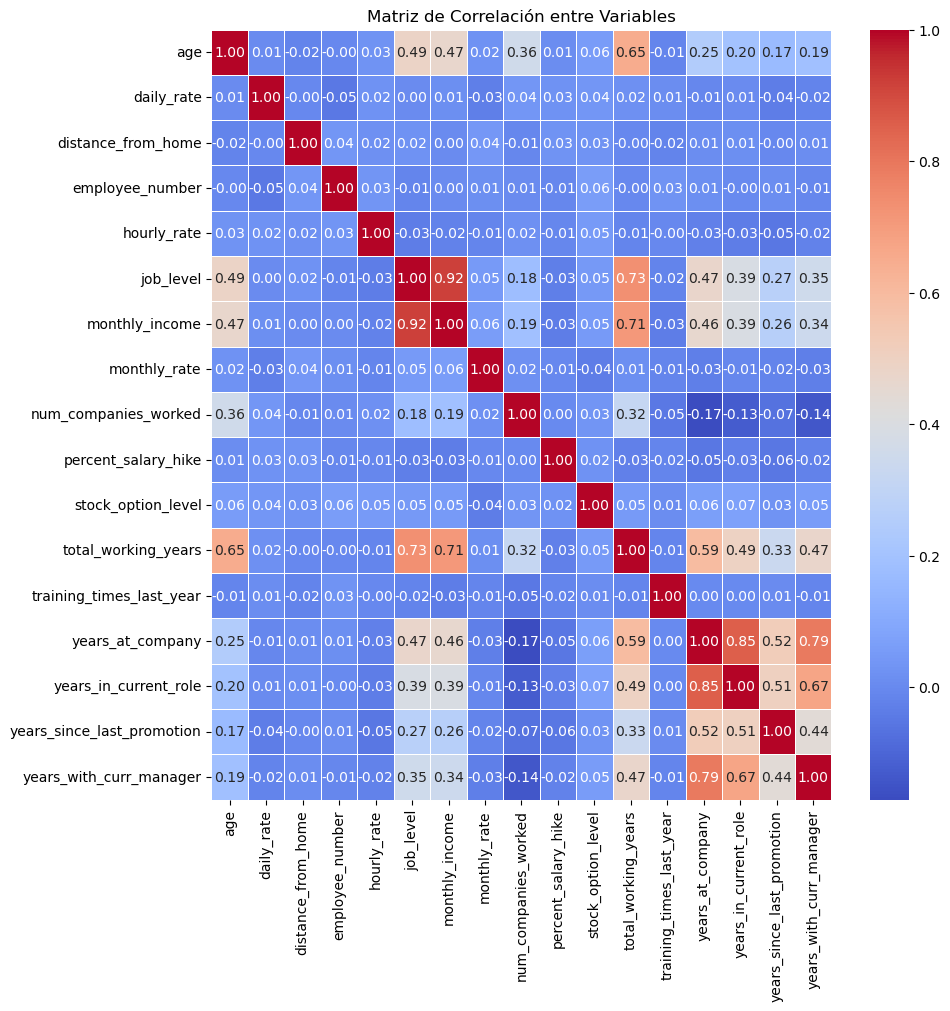

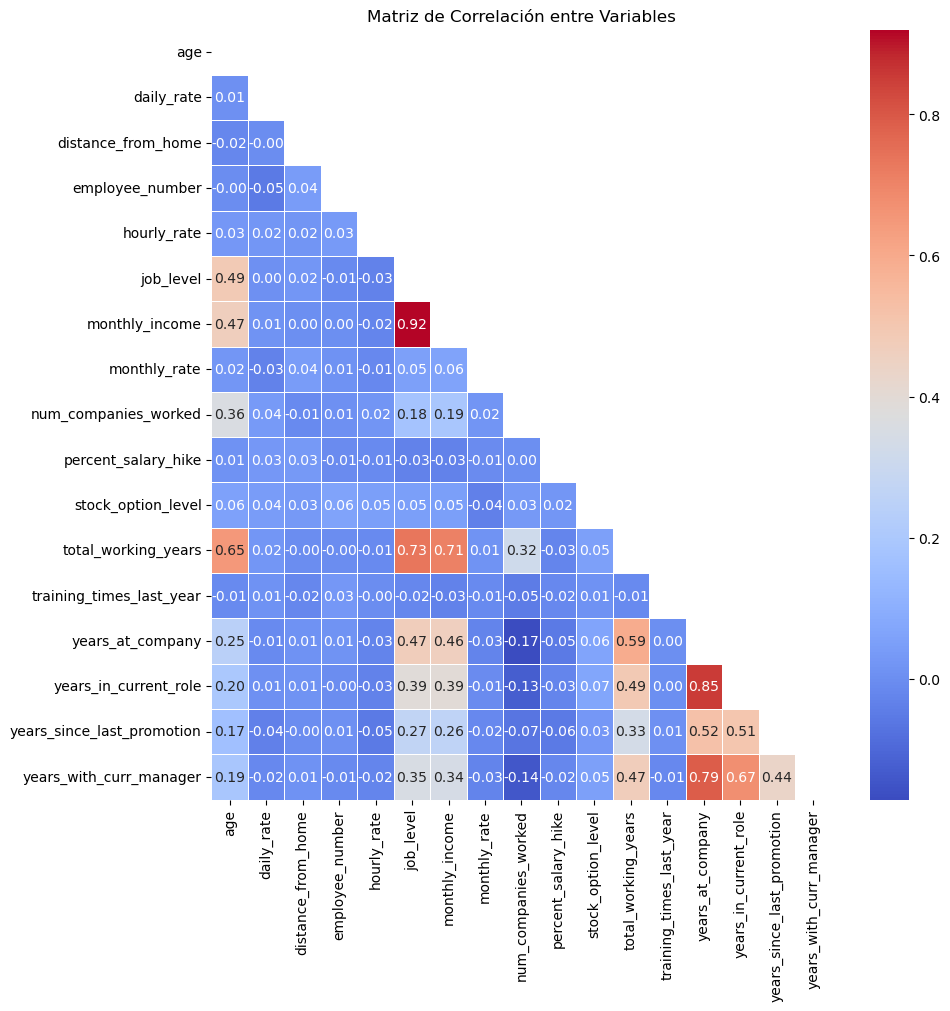

In [39]:
correlation_matrix = df_final.select_dtypes(include="number").corr(method="spearman")

# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()



mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Crear una máscara para mostrar sólo la parte superior de la matriz
#mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Añade título
plt.title('Matriz de Correlación entre Variables')
# Muestra el gráfico

plt.show()

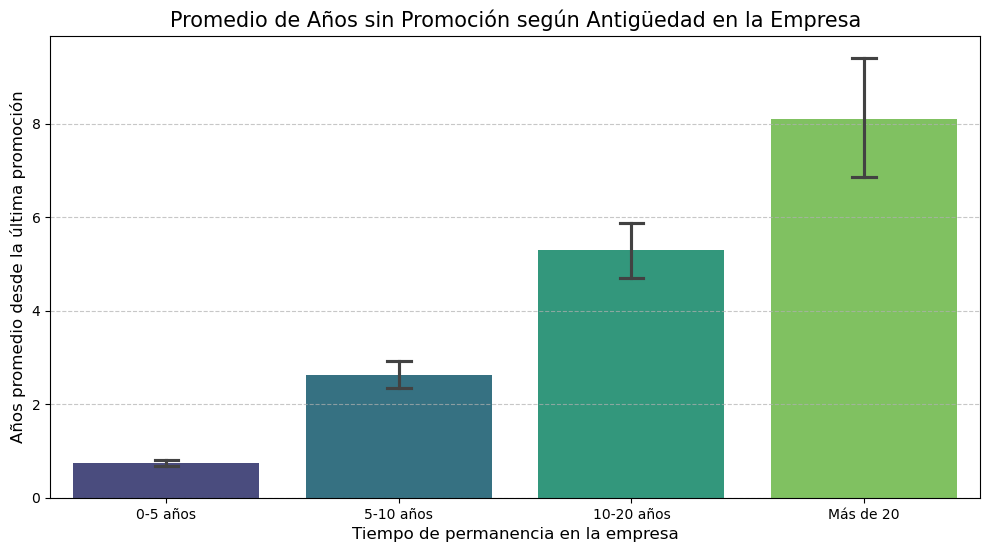

In [40]:
# 1. Creamos rangos de antigüedad para que sea más fácil de leer
df_final['rango_antiguedad'] = pd.cut(df_final['years_at_company'], 
                                     bins=[0, 5, 10, 20, 40], 
                                     labels=['0-5 años', '5-10 años', '10-20 años', 'Más de 20'])

# 2. Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='rango_antiguedad', y='years_since_last_promotion', 
            palette='viridis', capsize=.1)

plt.title('Promedio de Años sin Promoción según Antigüedad en la Empresa', fontsize=15)
plt.xlabel('Tiempo de permanencia en la empresa', fontsize=12)
plt.ylabel('Años promedio desde la última promoción', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

# Análisis de Estancamiento Laboral

Esta gráfica de barras es una de las más reveladoras para un departamento de Recursos Humanos, ya que mide directamente el estancamiento laboral.

Aquí tienes la explicación detallada de lo que nos está diciendo:

---

### 1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Agrupa a los empleados por su "edad" dentro de la empresa (tenure). Va desde los recién llegados (0-5 años) hasta los veteranos (más de 20 años).
* **Eje (Vertical):** Representa la media de años que han pasado desde que el empleado recibió su última promoción.

---

### 2. La Tendencia Principal: "El efecto acumulativo"

La gráfica muestra una escalera ascendente clara. Esto es lógico, pero nos da un dato interesante:

* En los primeros 5 años, la gente suele promocionar rápido (el promedio de espera es de menos de 1 año).
* Sin embargo, al permanecer 10-20 años en la empresa, el tiempo de espera se dispara a más de 5 años.
* Para los veteranos (más de 20 años), la espera media supera los 8 años.

Las líneas en la parte superior de cada barra indican la variabilidad o incertidumbre de los datos:

* En el grupo de 0-5 años, la línea es muy pequeña. Esto significa que casi todos los empleados nuevos viven la misma experiencia: promocionan rápido.
* En el grupo de Más de 20 años, la línea es mucho más larga. Esto indica que hay mucha desigualdad ya que algunos veteranos han promocionado hace poco, pero otros llevan aproximadamente 15 años en el mismo puesto, lo que ensancha el margen (outliers).

---

### 3. Conclusión:

La gráfica sugiere que la empresa tiene un **techo de cristal** o un embudo en las posiciones intermedias y senior. Mientras que el talento joven se mueve rápido, el talento con experiencia parece quedarse "atrapado" en sus roles por mucho más tiempo.

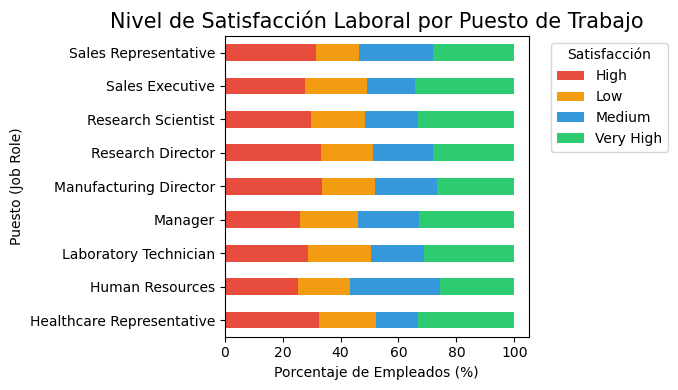

In [41]:
# 1. Creamos una tabla de porcentajes para comparar roles de distintos tamaños
rol_satisfaccion = pd.crosstab(df_final['job_role'], df_final['job_satisfaction'], normalize='index') * 100

# 2. Graficamos
rol_satisfaccion.plot(kind='barh', stacked=True, figsize=(7,4), 
                      color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'])

plt.title('Nivel de Satisfacción Laboral por Puesto de Trabajo', fontsize=15)
plt.xlabel('Porcentaje de Empleados (%)')
plt.ylabel('Puesto (Job Role)')
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧
# Análisis de Satisfacción por Puesto de Trabajo

Esta visualización de barras apiladas muestra la distribución porcentual de los niveles de **Satisfacción Laboral** dentro de cada **Puesto de Trabajo** (Job Role).

### 1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Representa el porcentaje acumulado (0-100%) de empleados dentro de cada rol, segmentado por colores según su nivel de satisfacción.
* **Eje (Vertical):** Lista los diferentes puestos de trabajo (Job Roles) presentes en la empresa.

---

### 2. Tendencias Principales

La gráfica permite comparar la "felicidad" relativa entre departamentos de forma equitativa:

* **Homogeneidad en la insatisfacción:** La proporción de empleados con satisfacción **"Low"** (naranja) es muy similar en casi todos los puestos, rondando entre el 15% y el 20%. Esto sugiere que la insatisfacción no está ligada a un rol específico.
* **Puestos con mayor entusiasmo:** Si sumamos las categorías **"High"** (rojo) y **"Very High"** (verde), roles como *Sales Representative*, *Healthcare Representative* y *Research Director* muestran el personal más comprometido.
* **Neutralidad en RR.HH.:** El puesto de *Human Resources* presenta la barra de satisfacción **"Medium"** (azul) más ancha, indicando un estado de conformidad intermedia en este equipo.

---

### 3. Conclusión:

La gráfica sugiere que la empresa goza de una salud laboral estable en todos sus niveles, ya que no hay un "puesto crítico" con descontento mayoritario. Sin embargo, existe una oportunidad de mejora para convertir el grueso de satisfacción "Medium" y "High" en niveles "Very High" mediante políticas de motivación específicas por departamento.

In [42]:
df_final.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'rango_antiguedad'],
      dtype='object')

## Bloque 1: Equidad de Género y Condiciones Laborales

En esta sección se analiza si existen diferencias en oportunidades de crecimiento,compensación y bienestar laboral en función del género, con el objetivo de detectar posibles desigualdades estructurales dentro de la empresa.


#### Objetivo del análisis

##### Evaluar si existen diferencias significativas entre hombres y mujeres en:

- Acceso a promociones
- Nivel jerárquico
- Incrementos salariales

Con el fin de detectar posibles desigualdades de género y proponer mejoras en las políticas de Recursos Humanos.

#### Variables utilizadas

Para este análisis se utilizan las siguientes variables del dataset:

- `Gender`: género del empleado.
- `YearsSinceLastPromotion`: años desde la última promoción.
- `JobLevel`: nivel jerárquico del puesto.
- `PercentSalaryHike`: porcentaje de incremento salarial.


***


#### Análisis 1.1: Género y acceso a promociones


Se analiza si existen diferencias entre hombres y mujeres en el tiempo medio transcurrido desde la última promoción, como indicador del acceso a oportunidades de crecimiento dentro de la empresa.


In [43]:
df = pd.read_csv("hr.csv")


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,lABORATORY tECHNICIAN,3.0,Single,2090.0,2396,6,Y,Yes,15,3,2,NaN,0,7,3.0,3,0,0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,rESEARCH sCIENTIST,3.0,Married,2909.0,23159,1,Y,Yes,11,3,3,80.0,0,8,3.0,3,8,7,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,lABORATORY tECHNICIAN,2.0,Married,3468.0,16632,9,Y,No,12,3,4,80.0,1,6,3.0,3,2,2,2,2.0


In [44]:
# Calculamos la media de años desde la última promoción por género

promotion_by_gender = (
    df.groupby('Gender')['YearsSinceLastPromotion']
      .mean()
      .reset_index()
)

promotion_by_gender

,Gender,YearsSinceLastPromotion
0,Female,2.292020
1,Male,2.110734


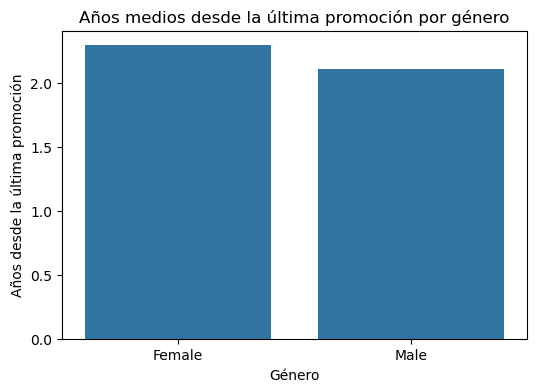

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=promotion_by_gender,
    x='Gender',
    y='YearsSinceLastPromotion'
)

plt.title('Años medios desde la última promoción por género')
plt.xlabel('Género')
plt.ylabel('Años desde la última promoción')
plt.show()


### Conclusión


Al analizar la gráfica de "Años medios desde la última promoción por género", se observa una métrica clave para entender la velocidad de crecimiento dentro de la organización.

Esta métrica evalúa el tiempo promedio que transcurre antes de que un empleado reciba un ascenso, segmentado por género.

Mujeres (Female): Aproximadamente 2.3 años.

Hombres (Male): Aproximadamente 2.1 años.

Existe una ligera disparidad en los tiempos de promoción. En promedio, las mujeres esperan cerca de un 10% más de tiempo que sus compañeros masculinos para ser promocionadas. Aunque la diferencia absoluta es pequeña (aprox. 0.2 años), es un indicador que merece atención para asegurar que el desarrollo de carrera sea totalmente equitativo.

### Recomendaciones Estratégicas:

Auditoría de Promociones: Se recomienda revisar los criterios de evaluación de desempeño para asegurar que sean 100% objetivos y no existan sesgos inconscientes que retrasen el avance del talento femenino.

Programas de Mentoría: Implementar iniciativas de acompañamiento para mujeres en niveles medios (donde ya vimos que tienen un JobLevel alto) para acelerar su transición hacia puestos de mayor responsabilidad.

Análisis por Departamento: Sería ideal desglosar estos datos por áreas; a veces una brecha general es causada por un solo departamento con prácticas menos inclusivas.


***


#### Análisis 1.2: Género, nivel jerárquico e incremento salarial

En este análisis se estudia si existen diferencias de género en:

- El nivel jerárquico alcanzado dentro de la empresa.

- El porcentaje de incremento salarial recibido.


El objetivo es detectar posibles desigualdades en la progresión profesional
y en la compensación económica entre hombres y mujeres.


### Variables utilizadas

- `Gender`: género del empleado.
- `JobLevel`: nivel jerárquico del puesto (a mayor valor, mayor responsabilidad).
- `PercentSalaryHike`: porcentaje de incremento salarial.


#### Análisis 1.3: Género y nivel jerárquico

Pregunta de negocio:
¿Existen diferencias entre hombres y mujeres en el nivel jerárquico medio
que alcanzan dentro de la empresa?


In [46]:
joblevel_by_gender = (
    df.groupby('Gender')['JobLevel']
      .mean()
      .reset_index()
)

joblevel_by_gender


,Gender,JobLevel
0,Female,2.117148
1,Male,2.028249


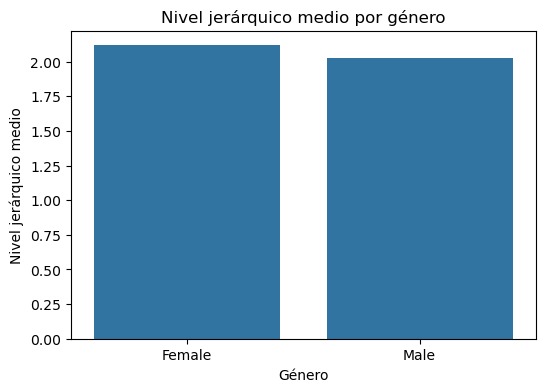

In [47]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=joblevel_by_gender,
    x='Gender',
    y='JobLevel'
)

plt.title('Nivel jerárquico medio por género')
plt.xlabel('Género')
plt.ylabel('Nivel jerárquico medio')
plt.show()


### Conclusión:

Los datos revelan una equidad sustancial en la jerarquía de la empresa. De hecho, el talento femenino presenta un nivel jerárquico medio ligeramente superior (0.089 puntos por encima) al masculino.

Interpretación para RRHH:

Acceso a Oportunidades: No se detecta un "techo de cristal" inmediato en los niveles medios, ya que ambos géneros orbitan el nivel 2 de forma equilibrada.

Retención de Talento: La paridad en el JobLevel sugiere que las políticas de promoción interna se están aplicando con criterios objetivos, logrando una distribución equitativa de las responsabilidades.

#### Análisis 1.4: Género e incremento salarial

Pregunta de negocio:

¿Existen diferencias en el porcentaje de incremento salarial entre hombres
y mujeres dentro de la empresa?


In [48]:
salary_hike_by_gender = (
    df.groupby('Gender')['PercentSalaryHike']
      .mean()
      .reset_index()
)

In [49]:
salary_hike_by_gender

,Gender,PercentSalaryHike
0,Female,15.190153
1,Male,15.218079


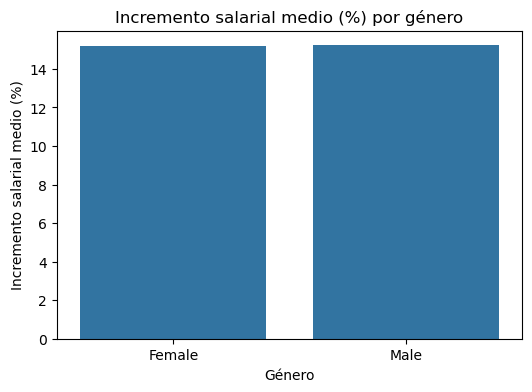

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=salary_hike_by_gender,
    x='Gender',
    y='PercentSalaryHike'
)

plt.title('Incremento salarial medio (%) por género')
plt.xlabel('Género')
plt.ylabel('Incremento salarial medio (%)')
plt.show()


### Conclusión

Tras analizar el porcentaje de incremento salarial (PercentSalaryHike) desglosado por género, los resultados son los siguientes:

Mujeres (Female): 15.19%

Hombres (Male): 15.21%

Interpretación de los hallazgos:

Paridad Salarial: La diferencia entre ambos géneros es de apenas un 0.02%, lo que representa una igualdad prácticamente perfecta en las políticas de aumento salarial de la compañía.

Criterios Objetivos: Esta similitud tan estrecha sugiere que los incrementos se basan en méritos, rendimiento o escalas preestablecidas, sin sesgos de género detectables en esta métrica.

Salud Organizacional: Para el departamento de RRHH, este es un indicador clave de éxito en materia de igualdad de oportunidades, reforzando una cultura empresarial justa y transparente.



#### Análisis 1.5: Género, antigüedad y progresión jerárquica

En los análisis anteriores se ha observado que el nivel jerárquico medio es
muy similar entre hombres y mujeres. Sin embargo, este indicador por sí solo
no permite evaluar si ambos géneros alcanzan dichos niveles con la misma
velocidad de promoción.

Por ello, en este análisis se cruza el nivel jerárquico con la antigüedad
en la empresa, con el objetivo de evaluar la progresión profesional de
hombres y mujeres a lo largo del tiempo.


### Variables utilizadas

- `Gender`: género del empleado.
- `YearsAtCompany`: años de antigüedad en la empresa.
- `JobLevel`: nivel jerárquico del puesto.


In [51]:
# Definimos tramos de antigüedad
bins = [0, 5, 10, 15, 20, df['YearsAtCompany'].max()]
labels = ['0-5 años', '6-10 años', '11-15 años', '16-20 años', 'Más de 20 años']

df['TenureGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=bins,
    labels=labels,
    right=True
)

df[['YearsAtCompany', 'TenureGroup']].head()


,YearsAtCompany,TenureGroup
0,6,6-10 años
1,10,6-10 años
2,0,NaN
3,8,6-10 años
4,2,0-5 años


In [52]:
joblevel_tenure_gender = (
    df.groupby(['TenureGroup', 'Gender'])['JobLevel']
      .mean()
      .reset_index()
)

joblevel_tenure_gender


,TenureGroup,Gender,JobLevel
0,0-5 años,Female,1.752613
1,0-5 años,Male,1.665924
2,6-10 años,Female,2.143678
3,6-10 años,Male,2.131387
4,11-15 años,Female,2.588235
5,11-15 años,Male,2.263158
6,16-20 años,Female,3.157895
7,16-20 años,Male,3.088235
8,Más de 20 años,Female,3.875000
9,Más de 20 años,Male,4.476190


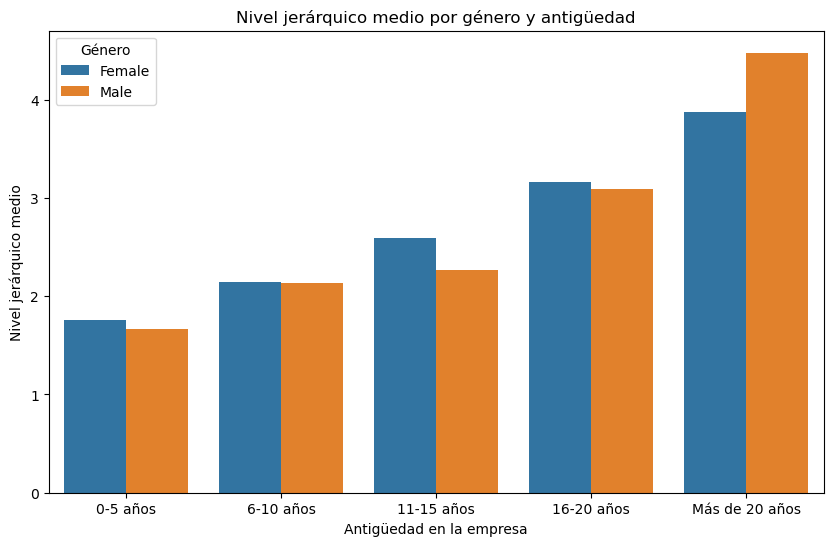

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=joblevel_tenure_gender,
    x='TenureGroup',
    y='JobLevel',
    hue='Gender'
)

plt.title('Nivel jerárquico medio por género y antigüedad')
plt.xlabel('Antigüedad en la empresa')
plt.ylabel('Nivel jerárquico medio')
plt.legend(title='Género')
plt.show()


### Conclusión

Evolución de la Carrera Profesional (Género vs. Antigüedad)
Este gráfico de barras agrupadas permite visualizar si el crecimiento jerárquico dentro de la empresa sigue un ritmo equitativo a medida que los empleados acumulan años de experiencia.

0-15 años de antigüedad: El talento femenino mantiene un nivel jerárquico medio ligeramente superior al masculino en todos los tramos iniciales.

16-20 años de antigüedad: Se observa una paridad casi absoluta, con las mujeres manteniendo una mínima ventaja en el nivel de puesto.

Más de 20 años de antigüedad: Es el único segmento donde el nivel jerárquico masculino supera claramente al femenino, alcanzando el nivel más alto de la gráfica (cercano al nivel 4.5).

### Conclusiones Clave para RRHH:

Liderazgo Femenino Consistente: En las primeras dos décadas de carrera, las mujeres no solo compiten en igualdad, sino que alcanzan niveles jerárquicos ligeramente superiores a sus compañeros con la misma antigüedad.

El Techo de Cristal Tardío: La brecha que aparece a partir de los 20 años de antigüedad sugiere que, históricamente, los puestos de altísima dirección (Nivel 4-5) han sido ocupados mayoritariamente por hombres. Esto podría deberse a dinámicas de promociones de hace décadas que aún se reflejan en la plantilla más veterana.

Tendencia de Cambio: La superioridad del nivel femenino en los tramos más jóvenes (0-15 años) indica que las políticas actuales de equidad están funcionando y que las futuras promociones a la alta dirección probablemente sean mucho más equilibradas.

Recomendación: Focalizar los planes de sucesión para los puestos de máximo nivel en las mujeres que se encuentran actualmente en el tramo de 16-20 años, para cerrar la brecha histórica detectada en el segmento de más de 20 años de antigüedad.


In [54]:
df = pd.read_csv("hr.csv")


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,lABORATORY tECHNICIAN,3.0,Single,2090.0,2396,6,Y,Yes,15,3,2,NaN,0,7,3.0,3,0,0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,rESEARCH sCIENTIST,3.0,Married,2909.0,23159,1,Y,Yes,11,3,3,80.0,0,8,3.0,3,8,7,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,lABORATORY tECHNICIAN,2.0,Married,3468.0,16632,9,Y,No,12,3,4,80.0,1,6,3.0,3,2,2,2,2.0


In [55]:
# Agrupamos por género y calculamos la media del equilibrio vida-trabajo
wlb_by_gender = (
    df.groupby('Gender')['WorkLifeBalance']
    .mean()
    .reset_index()
)

# Mostramos la tabla de resultados
wlb_by_gender

,Gender,WorkLifeBalance
0,Female,2.764007
1,Male,2.760452


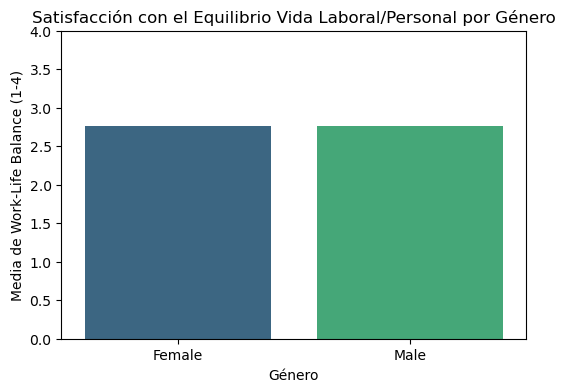

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=wlb_by_gender,
    x='Gender',
    y='WorkLifeBalance',
    palette='viridis'
)

plt.title('Satisfacción con el Equilibrio Vida Laboral/Personal por Género')
plt.xlabel('Género')
plt.ylabel('Media de Work-Life Balance (1-4)')
plt.ylim(0, 4) # La escala suele ser de 1 a 4
plt.show()

#### Conclusión:

Equilibrio Vida Laboral/Personal (Work-Life Balance)
Este indicador es vital para medir la sostenibilidad del talento a largo plazo. Una puntuación equilibrada entre géneros sugiere una cultura de flexibilidad compartida.

Mujeres (Female): 2.76 (aprox.)

Hombres (Male): 2.76 (aprox.)

Análisis de los resultados: Al observar la visualización, la paridad es prácticamente matemática. Ambos grupos se sitúan ligeramente por encima de la media de la escala (que es 2.5), indicando que los empleados perciben un nivel de equilibrio satisfactorio. No existen sesgos de género que obliguen a un grupo a sacrificar más su vida personal que el otro para cumplir con sus objetivos profesionales.

#### Conclusiones Clave para RRHH:

Políticas de Conciliación Efectivas: La uniformidad en los datos confirma que las herramientas de conciliación (como horarios flexibles o días de trabajo remoto) están disponibles y son utilizadas por igual, sin distinción de género.

Cultura de Bienestar: Mantener un nivel cercano a 3 en una escala de 4 es un indicador positivo de salud organizacional, lo cual reduce el riesgo de burnout y rotación no deseada.

#### Recomendación: 

Dado que la puntuación es idéntica, la empresa debería utilizar este dato en su Employer Branding para atraer nuevo talento. Se recomienda realizar sesiones de "focus group" para identificar si este 2.76 puede elevarse a un 3.0 mediante beneficios específicos (como flexibilidad extra en periodos de alta carga de trabajo) para mantener la competitividad frente a otras empresas del sector.

***


## Bloque 2: Evolución Profesional y Antigüedad

#### 2.1 Formación vs. Agilidad de Promoción

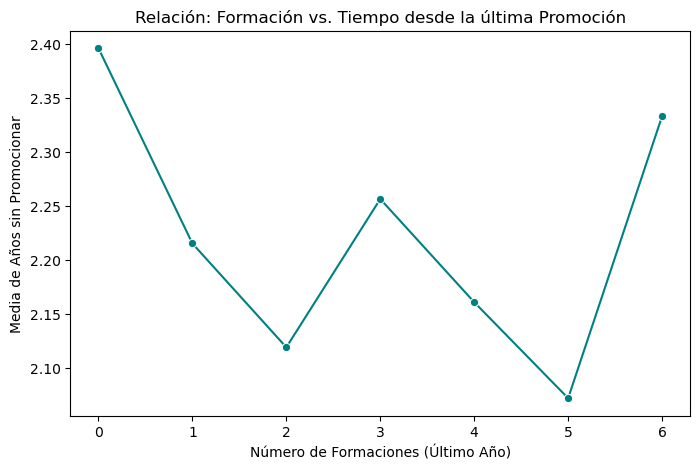

In [57]:
# Agrupamos por formaciones recibidas y calculamos la media de años desde la última promoción
promo_training = df.groupby('TrainingTimesLastYear')['YearsSinceLastPromotion'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
sns.lineplot(data=promo_training, x='TrainingTimesLastYear', y='YearsSinceLastPromotion', marker='o', color='teal')
plt.title('Relación: Formación vs. Tiempo desde la última Promoción')
plt.xlabel('Número de Formaciones (Último Año)')
plt.ylabel('Media de Años sin Promocionar')
plt.show()

#### Conclusión: 

Este análisis evalúa si existe una correlación directa entre la cantidad de capacitaciones recibidas el año anterior (TrainingTimesLastYear) y la agilidad para obtener un ascenso (YearsSinceLastPromotion).

Punto Máximo de Espera: Empleados con 0 formaciones son los que más tiempo llevan esperando una promoción (aprox. 2.4 años).

Punto de Mayor Agilidad: Los empleados con 5 formaciones son los que promocionan más rápido, con una media de espera de solo 2.07 años.

El efecto rebote: Curiosamente, al llegar a 6 formaciones, el tiempo de espera vuelve a subir drásticamente hasta los 2.33 años.

#### Conclusión Profesional: 

Los datos sugieren que la formación sí acelera la carrera profesional, pero solo hasta cierto punto. Existe una "zona óptima" de 2 a 5 formaciones anuales donde el tiempo de espera para un ascenso se reduce significativamente. Sin embargo, el repunte en 6 formaciones podría indicar un perfil de empleado muy especializado que se mantiene en su rol técnico sin saltar a niveles jerárquicos superiores, o una sobrecapacitación que no se traduce en movimientos internos.

#### Recomendaciones Estratégicas para RRHH:

Fomentar la Capacitación Activa: Es evidente que el grupo con 0 formación está estancado. RRHH debe intervenir proactivamente ofreciendo al menos 2 cursos anuales para reactivar su línea de carrera.

Identificar el "Techo del Especialista": Investigar por qué los empleados con 6 formaciones tardan más en promocionar. Si son perfiles clave, se deben crear itinerarios de promoción técnica (expertos) paralelos a los de gestión para que su formación se traduzca en crecimiento jerárquico.

Optimización del Presupuesto: Dado que el beneficio en agilidad de promoción es máximo con 5 formaciones, este debería ser el objetivo recomendado para los planes de desarrollo individual (PDI).

#### 2.2 Jerarquía y Frecuencia de Viajes

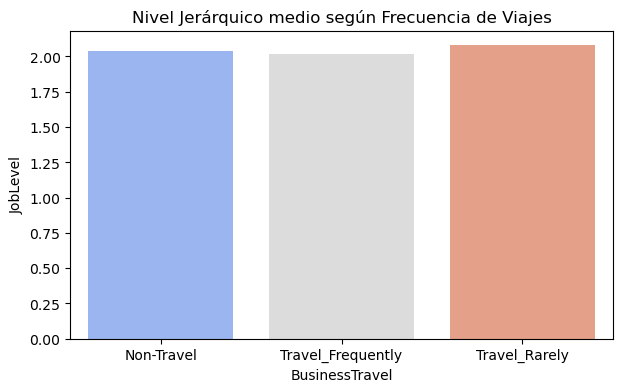

In [58]:
# Nivel jerárquico medio según la frecuencia de viaje
job_travel = df.groupby('BusinessTravel')['JobLevel'].mean().reset_index()

# Gráfico
plt.figure(figsize=(7, 4))
sns.barplot(data=job_travel, x='BusinessTravel', y='JobLevel', palette='coolwarm')
plt.title('Nivel Jerárquico medio según Frecuencia de Viajes')
plt.show()

#### Conclusión:

Este análisis permite identificar si la movilidad geográfica es un requisito implícito para alcanzar niveles de responsabilidad superiores en la compañía.

Viajes Frecuentes (Travel_Frequently): Presentan un nivel jerárquico medio de 2.01.

Viajes Raros (Travel_Rarely): Curiosamente, este grupo lidera con el nivel jerárquico medio más alto: 2.08.

Sin Viajes (Non-Travel): Se mantienen en un nivel intermedio de 2.04.

#### Conclusión Profesional: 

Los datos revelan un hallazgo inesperado: no existe una correlación directa entre viajar más y tener un puesto más alto. De hecho, los empleados que viajan "Rara vez" ostentan niveles jerárquicos ligeramente superiores a quienes viajan "Frecuentemente". Esto sugiere que la estructura de liderazgo de la empresa no depende de la presencia física constante en diferentes sedes, lo que indica una cultura orientada a la gestión por objetivos más que a la movilidad.

#### Recomendaciones Estratégicas para RRHH:

Revisión de la Carga de Viaje en Niveles Medios: Dado que los perfiles con viajes frecuentes no tienen mayor rango jerárquico (2.01), es vital asegurar que esta exigencia de movilidad no esté penalizando su calidad de vida sin una compensación jerárquica clara.

Optimización del Trabajo en Remoto: Al observar que los niveles más altos (2.08) viajan poco, la empresa tiene una oportunidad de oro para estandarizar modelos de liderazgo híbrido o remoto, demostrando que se puede dirigir con éxito sin necesidad de desplazamientos constantes.

Encuesta de Retención para Viajeros: Debido a que el grupo de "Viajes Frecuentes" tiene el nivel jerárquico más bajo de los tres, RRHH debería vigilar su tasa de rotación; el desgaste por viaje sin una progresión de carrera superior al resto podría generar fugas de talento.

#### 2.3 Relación entre número de empresas y salario

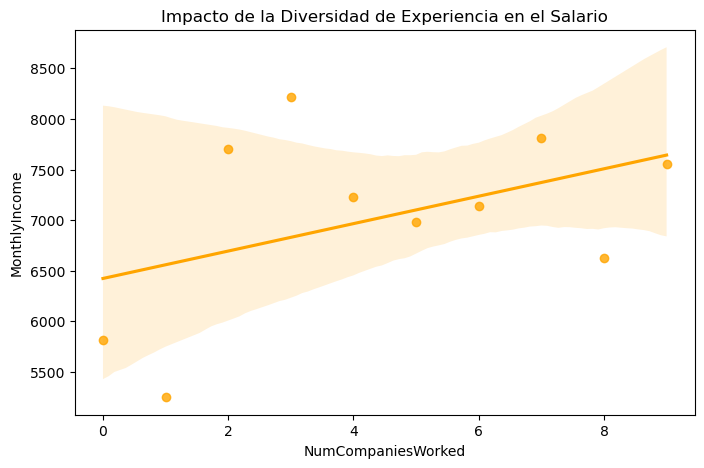

In [59]:
# Relación entre número de empresas y salario mensual
companies_salary = df.groupby('NumCompaniesWorked')['MonthlyIncome'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
sns.regplot(data=companies_salary, x='NumCompaniesWorked', y='MonthlyIncome', color='orange')
plt.title('Impacto de la Diversidad de Experiencia en el Salario')
plt.show()

#### Conclusión:

Este análisis examina si haber trabajado en múltiples empresas (NumCompaniesWorked) antes de incorporarse a la organización actual se traduce en un mayor ingreso mensual medio (MonthlyIncome).

Tendencia General: Existe una correlación positiva moderada; a medida que aumenta el número de empresas previas, el salario mensual tiende a subir.

Mínimos y Máximos: Los empleados que solo han trabajado en 1 empresa tienen los ingresos medios más bajos (aprox. 5,200), mientras que el pico salarial se observa en aquellos con experiencia en 3 empresas (aprox. 8,200).

Estabilización: A partir de las 5-6 empresas trabajadas, la tendencia se estabiliza, sugiriendo que el mercado deja de valorar incrementalmente la rotación externa excesiva.

#### Conclusión Profesional: 

Los datos sugieren que la organización valora y premia la experiencia diversa adquirida externamente. Existe una ventaja salarial clara para los perfiles que han rotado por 2 o 3 compañías antes de ingresar, lo cual es típico en estrategias de captación de talento senior. Sin embargo, la dispersión de los puntos (la "sombra" naranja) indica que la rotación excesiva (más de 7 empresas) no garantiza un salario mayor, pudiendo incluso percibirse como inestabilidad.

#### Recomendaciones Estratégicas para RRHH:

Auditoría de Equidad Interna: Es fundamental verificar si los empleados que han crecido "desde dentro" (pocas empresas trabajadas) tienen salarios competitivos frente a los nuevos fichajes externos. Si la brecha es muy grande, existe riesgo de fuga de talento leal.

Valoración del Talento Especializado: Dado que el ingreso sube con la experiencia previa, RRHH debe asegurar que los programas de retención de conocimiento compensen económicamente a quienes deciden hacer carrera larga en la empresa, igualando la oferta que recibirían fuera.

Análisis de Perfiles "Job Hoppers": Para candidatos con más de 8 empresas en su historial, el salario medio vuelve a bajar (aprox. 6,500 en el punto 8). Se recomienda evaluar con cuidado estos perfiles en selección, ya que su coste podría no estar alineado con la estabilidad que aportarán a largo plazo.

***


## Bloque 3: Factores de Movilidad y Logística

#### 3.1 Impacto de la Distancia en la Satisfacción

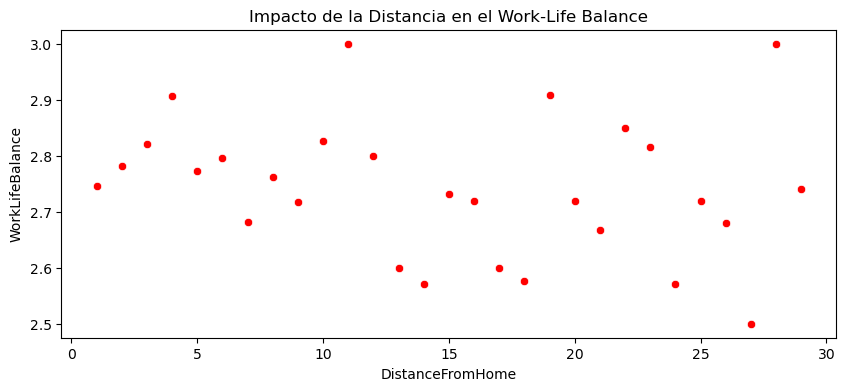

In [60]:
# Distancia media vs Satisfacción con el equilibrio vida-trabajo
dist_satisfaction = df.groupby('DistanceFromHome')['WorkLifeBalance'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dist_satisfaction, x='DistanceFromHome', y='WorkLifeBalance', color='red')
plt.title('Impacto de la Distancia en el Work-Life Balance')
plt.show()

#### Conclusión:

Este análisis es crucial para entender cómo el factor geográfico y los tiempos de desplazamiento afectan la percepción de bienestar (WorkLifeBalance) de los empleados.

Puntualizaciones Máximas: Se observan picos de satisfacción máxima (3.0) tanto en empleados que viven muy cerca (11 km) como en algunos que viven a distancias considerables (28 km).

Tendencia de Satisfacción Media: La mayoría de los datos se agrupan entre los niveles 2.6 y 2.9, lo que coincide con la media general de la empresa (2.76) que analizamos previamente.

Zonas de Riesgo: Se detecta una caída significativa en la satisfacción (nivel 2.5) en el rango de los 26-27 km, lo que podría marcar un "punto de fatiga" por desplazamiento.

#### Conclusión Profesional: 

A diferencia de lo que se podría esperar, la distancia al hogar no degrada de forma lineal la satisfacción del empleado. La dispersión de los puntos sugiere que otros factores compensatorios (como la flexibilidad horaria o el teletrabajo) están mitigando el impacto negativo de vivir lejos. No obstante, el descenso en los niveles de satisfacción al superar los 25 km indica que existe un límite físico donde el tiempo de trayecto empieza a pesar más que los beneficios ofrecidos.

#### Recomendaciones Estratégicas para RRHH:

Políticas de Teletrabajo Selectivas: Para los empleados que se encuentran en el "rango de riesgo" (más de 25 km), RRHH debería priorizar modelos de trabajo híbrido con mayor presencialidad opcional para recuperar esos puntos de satisfacción perdidos.

Ayudas a la Movilidad: Dado que hay empleados que mantienen una satisfacción alta (3.0) viviendo lejos (28 km), se recomienda investigar qué medidas están funcionando con ellos (ayudas de transporte, coches de empresa o flexibilidad de entrada) para replicarlas en el resto del grupo.

Captación de Talento Local: Para nuevas contrataciones de niveles jerárquicos que requieren presencia física constante, se sugiere priorizar candidatos en el radio de los 10-15 km, donde la estabilidad de la satisfacción es más consistente.

***

## Sueldo según educación

In [65]:
monthly_income_by_education = (df_final.groupby('education_field')['monthly_income']
                            .mean()
                            .reset_index()
)

monthly_income_by_education

,education_field,monthly_income
0,Human Resources,7733.565217
1,Life Sciences,6485.027778
2,Marketing,7390.489933
3,Medical,6499.719457
4,Other,5767.782051
5,Technical Degree,5802.946154


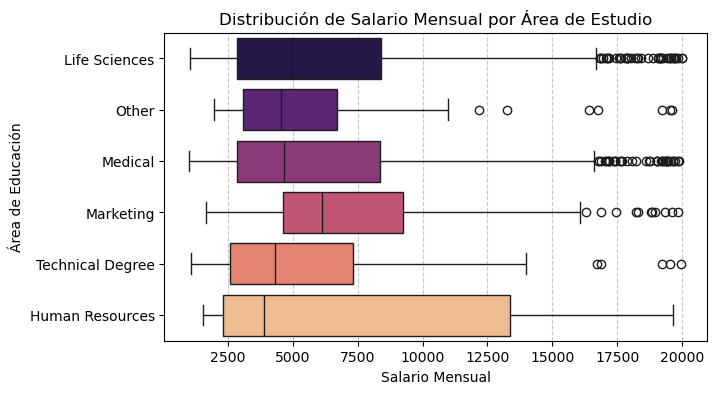

In [69]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_final, x='monthly_income', y='education_field', palette='magma')

plt.title('Distribución de Salario Mensual por Área de Estudio')
plt.xlabel('Salario Mensual')
plt.ylabel('Área de Educación')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Conclusión:**

Este análisis permite identificar cómo la formación académica de origen influye en el potencial económico dentro de la organización, revelando que el área de estudio no solo determina el salario base, sino también la amplitud de crecimiento (techos salariales).

- Picos de Ingresos y Liderazgo: El área de Human Resources destaca con el promedio mensual más alto (aprox 7,733) y una de las cajas más extendidas en el boxplot, lo que indica que, aunque hay mucha variabilidad, es el área con mayor potencial de alcanzar los rangos salariales máximos (cerca de 20,000).

- Consistencia en Marketing: Marketing muestra un promedio sólido (aprox 7,390) y una mediana visualmente más alta que la mayoría, con una dispersión equilibrada, lo que sugiere una estructura salarial competitiva y estable.

- Zonas de Salario Técnico: Las áreas de Technical Degree y Other presentan los promedios más bajos (aprox 5,802 y 5,767 respectivamente). En el gráfico de cajas, se observa que sus techos salariales son más limitados en comparación con las áreas de gestión o ciencias.

**Conclusión Profesional:**

A diferencia de otras variables, el área de estudio genera una segmentación clara en la capacidad de ahorro y remuneración. Mientras que Life Sciences y Medical tienen promedios similares (aprox 6,400), presentan una gran cantidad de outliers (puntos aislados a la derecha), lo que sugiere que en estas áreas el título es solo el punto de entrada, y que la especialización posterior o el nivel jerárquico son los que disparan el salario. Por el contrario, en Human Resources, el área de estudio parece abrir la puerta a rangos salariales muy diversos, desde niveles iniciales hasta la alta dirección.

**Recomendaciones Estratégicas para RRHH:**

- Revisión de Equidad para Perfiles Técnicos: Dado que los perfiles de Technical Degree muestran los salarios más bajos y menor dispersión, RRHH debería evaluar si existe un "techo de cristal" para estos empleados y si es necesario crear planes de carrera que les permitan saltar a bandas salariales de gestión.

- Ajuste de Expectativas en Reclutamiento: Para las áreas de Life Sciences y Medical, donde hay muchos valores atípicos, se recomienda auditar qué competencias permiten a esos empleados ganar por encima de la media, con el fin de estandarizar los criterios de promoción.

- Fomento de la Polivalencia: Dado el alto valor percibido en el mercado interno para los perfiles de Marketing y HR, se podrían crear programas de reskilling para que empleados de áreas con salarios más estancados puedan transicionar hacia estos roles con mayor potencial económico.

## Nivel jerárquico según la edad

In [76]:
job_level_by_age = (df_final.groupby('job_role')['age']
                            .mean()
                            .round(2)
                            .reset_index()
)

job_level_by_age

,job_role,age
0,Healthcare Representative,39.95
1,Human Resources,35.08
2,Laboratory Technician,34.13
3,Manager,46.76
4,Manufacturing Director,38.43
5,Research Director,43.79
6,Research Scientist,34.23
7,Sales Executive,36.95
8,Sales Representative,30.33


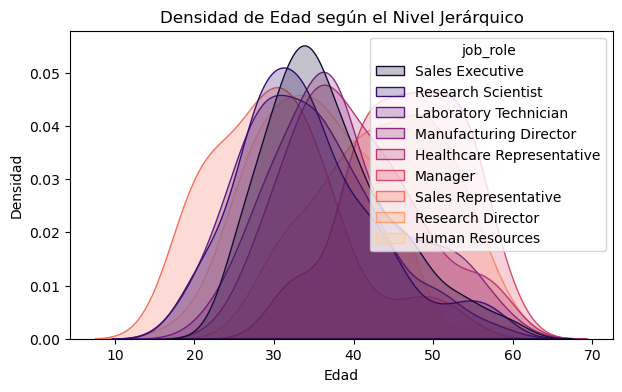

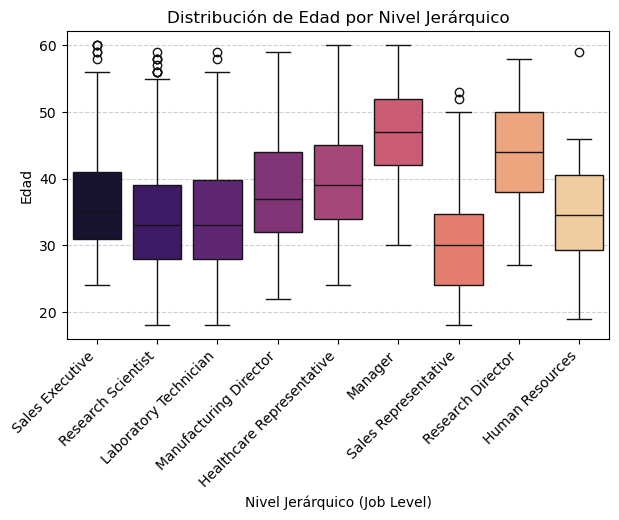

In [75]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df_final, x='age', hue='job_role', fill=True, palette='magma', common_norm=False)

plt.title('Densidad de Edad según el Nivel Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


plt.figure(figsize=(7, 4))
sns.boxplot(data=df_final, x='job_role', y='age', palette='magma')

plt.title('Distribución de Edad por Nivel Jerárquico')
plt.xlabel('Nivel Jerárquico (Job Level)')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Conclusión:
Este análisis revela una estructura organizacional basada en la experiencia acumulada, donde la edad actúa como un indicador de la progresión jerárquica, aunque con matices interesantes en roles técnicos y de ventas.

- Liderazgo Consolidado: Los roles de *Manager* (media de 46.76 años) y *Research Director* (43.79 años) presentan las distribuciones de edad más altas y compactas. Esto indica que el acceso a estos puestos requiere una madurez profesional significativa.
- Puertas de Entrada: El puesto de *Sales Representative* destaca por ser el más joven (media de 30.33 años), con una densidad que se concentra fuertemente entre los 20 y 35 años.
- Segmento Operativo: Los técnicos de laboratorio y científicos de investigación muestran una gran similitud demográfica, con medias de 34.13 y 34.23 años respectivamente.

#### Conclusión Profesional: 
La empresa presenta una pirámide demográfica saludable pero muy marcada por el rol. Mientras que el gráfico de densidad muestra solapamientos en la franja de los 30-40 años para la mayoría de los puestos, los *Managers* se separan claramente hacia el extremo superior de la escala. Un hallazgo clave es la presencia de **outliers** (puntos aislados) en el boxplot de roles como *Sales Executive* o *Research Scientist*, donde personas cercanas a los 60 años ocupan puestos que normalmente tienen medias mucho más bajas; esto sugiere la existencia de especialistas senior que aportan valor desde roles ejecutivos sin necesariamente transicionar a la gestión de personas.

#### Recomendaciones Estratégicas para RRHH:

- Brecha Generacional en Ventas: Existe un salto notable de más de 6 años entre el Sales Representative (30.33) y el Sales Executive (36.95). RRHH debería auditar si el plan de carrera interno permite una transición fluida para evitar la fuga de talento joven hacia la competencia durante este periodo de crecimiento.
- Gestión del Conocimiento Senior: Dado que los Managers y Research Directors tienen las medias de edad más altas, es vital implementar programas de *mentoring* donde estos perfiles transfieran conocimiento crítico a los Healthcare Representatives y **Manufacturing Directors (medias de 38-39 años), quienes son los sucesores naturales.

## Edad con tarifa mensual

In [82]:
# 1. Definimos los límites de los rangos y las etiquetas
# Ejemplo: 18-25, 26-35, 36-45, etc.
bins_edad = [18, 26, 36, 46, 56, 100]
labels_edad = ['18-25', '26-35', '36-45', '46-55', '56+']

# 2. Creamos una nueva columna temporal para el rango
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 3. Aplicamos el groupby usando esa nueva columna
monthly_rate_by_age_range = (df_final.groupby('age_range')['monthly_rate']
                             .mean()
                             .round(2)
                             .reset_index()
                            )

monthly_rate_by_age_range

,age_range,monthly_rate
0,18-25,15175.83
1,26-35,14218.15
2,36-45,13586.67
3,46-55,15415.27
4,56+,15559.58


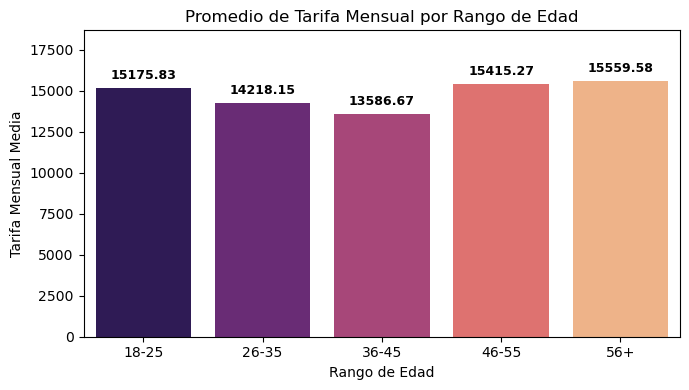

In [83]:
# 1. Crear los rangos de edad (bins)
bins = [18, 31, 41, 51, 61]
labels = ['18-30', '31-40', '41-50', '51-60']
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 2. Agrupar y calcular la media redondeada
monthly_rate_by_age = (df_final.groupby('age_range')['monthly_rate']
                       .mean()
                       .round(2)
                       .reset_index())

# 3. Visualización (Tamaño 7, 4)
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=monthly_rate_by_age, x='age_range', y='monthly_rate', palette='magma')

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9, fontweight='bold')

plt.title('Promedio de Tarifa Mensual por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Tarifa Mensual Media')
plt.ylim(0, monthly_rate_by_age['monthly_rate'].max() * 1.2)
plt.tight_layout()
plt.show()

#### Conclusión:

El agrupamiento de datos por rangos generacionales revela una estructura de costos operativos (`monthly_rate`) relativamente plana, con una ligera tendencia en forma de "U" que destaca valores más altos en los extremos de la vida laboral.

- Estabilidad en la Franja Central: Se observa un descenso gradual en el promedio de la tarifa desde el grupo de *18-25 años (15,175.83)* hasta alcanzar su punto mínimo en el grupo de *36-45 años (13,586.67)*.
- Repunte en Perfiles Senior:** A partir de los 46 años, la tarifa vuelve a subir, alcanzando su punto máximo en los empleados de *56+ años con 15,559.58*.
- Equidad de Coste: A pesar de las variaciones, la diferencia máxima entre el rango más alto y el más bajo es de aproximadamente *1,973 unidades*, lo que representa una desviación menor al 15% respecto al promedio general.

#### Conclusión Profesional:

A diferencia de otras métricas salariales que crecen linealmente con la edad, la `monthly_rate` muestra que el valor operativo de los empleados más jóvenes (18-25) es prácticamente equivalente al de los perfiles más veteranos (56+). Esto sugiere que la organización valora el ímpetu y las competencias actualizadas del talento junior de la misma forma que la experiencia crítica de los seniors. La caída en el rango de *36-45 años* podría indicar una etapa de transición donde el personal ocupa roles de gestión intermedia que no necesariamente están vinculados a las tarifas técnicas más altas.

#### Recomendaciones Estratégicas para RRHH:

- Rentabilidad del Talento Intermedio: El grupo de *36-45 años* representa la franja de edad con el coste de tarifa más eficiente para la empresa. RRHH debería potenciar la formación en liderazgo para este grupo, maximizando su valor antes de que entren en bandas de coste superior.
- Incentivos para Jóvenes Talentos: Dado que el rango de *18-25 años* ya entra con una tarifa competitiva (superior a los 15,000), la empresa debe asegurar que el retorno en innovación y agilidad de estos perfiles justifique dicha inversión inicial.
- Aprovechamiento de la Experiencia Senior: Con el pico de tarifa en *56+*, se recomienda asignar a estos empleados a proyectos de alta consultoría interna o mentoría, donde su coste operativo se vea compensado por la transferencia de conocimiento estratégico hacia los rangos inferiores.

## edad con numero empresas


In [86]:
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 3. Aplicamos el groupby usando esa nueva columna
monthly_rate_by_age_range = (df_final.groupby('age_range')['num_companies_worked']
                             .mean()
                             .round(2)
                             .reset_index()
                            )

monthly_rate_by_age_range

,age_range,num_companies_worked
0,18-25,1.31
1,26-35,2.12
2,36-45,3.11
3,46-55,3.86
4,56+,4.16


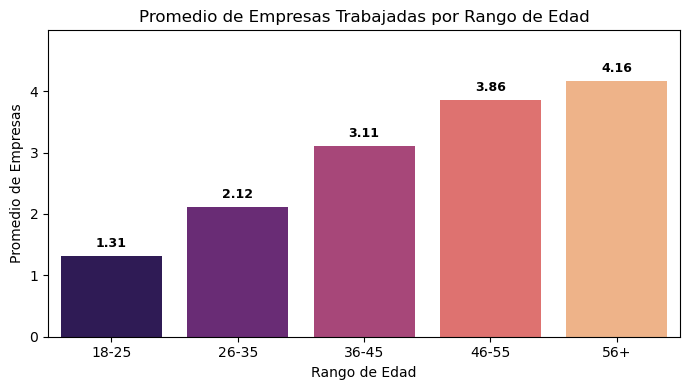

In [85]:
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

companies_by_age = (df_final.groupby('age_range')['num_companies_worked']
                    .mean()
                    .round(2)
                    .reset_index())

plt.figure(figsize=(7, 4))
ax = sns.barplot(data=companies_by_age, x='age_range', y='num_companies_worked', palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontsize=9, fontweight='bold')

plt.title('Promedio de Empresas Trabajadas por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Promedio de Empresas')
plt.ylim(0, companies_by_age['num_companies_worked'].max() * 1.2)
plt.tight_layout()
plt.show()

#### Conclusión:

El agrupamiento de datos por rangos generacionales revela una progresión ascendente y constante en la trayectoria laboral externa, confirmando que la acumulación de experiencias en diferentes organizaciones es proporcional al avance de la carrera profesional.

- Crecimiento Lineal de la Experiencia Externa Se observa un incremento sostenido en el promedio de empresas trabajadas, partiendo desde el grupo de *18-25 años (1.31)* hasta alcanzar el máximo en el grupo de *56+ años (4.16)*.
- Estabilidad en la Etapa Temprana: El salto más significativo se produce al superar los 25 años, donde el promedio aumenta un 61% (de 1.31 a 2.12), lo que marca el fin de la etapa de inserción laboral inicial.
- Madurez de Perfil Multi-empresa: A partir de los 46 años, el promedio se estabiliza por encima de las 3.8 empresas, lo que indica que el talento senior aporta una visión diversa derivada de haber navegado en múltiples culturas organizacionales.

#### Conclusión Profesional:

A diferencia de la `monthly_rate`, que presentaba una tendencia en "U", la movilidad externa (`num_companies_worked`) muestra un comportamiento lineal predecible. Esto sugiere que la plantilla no padece de un fenómeno de rotación volátil o "job hopping" agresivo, sino de una transición natural de carrera. Los datos indican que la empresa cuenta con un capital intelectual robusto: el talento joven entra con una trayectoria enfocada, mientras que el talento senior actúa como un puente de mejores prácticas externas, habiendo conocido un promedio de cuatro entornos corporativos distintos antes de su etapa actual.

#### Recomendaciones Estratégicas para RRHH:

- Fidelización del Talento Junior-Medio: Dado que el mayor incremento de movilidad externa ocurre entre los *26 y 35* años, RRHH debe fortalecer los planes de carrera y rotación interna en este segmento para evitar que busquen esa "diversidad de experiencias" fuera de la compañía.
- Aprovechamiento del Bagaje Senior: Los empleados de los rangos *46-55 y 56+* poseen la mayor riqueza de perspectivas externas. Se recomienda integrarlos en comités de innovación o mejora de procesos, donde su visión comparativa de otras empresas pueda optimizar las metodologías internas.
- Gestión de Expectativas en Contratación: Para las nuevas vacantes en rangos intermedios (36-45 años), el estándar de mercado según estos datos es de aproximadamente 3 empresas previas. Perfiles que superen significativamente este promedio podrían requerir planes de incentivos más dinámicos para asegurar su permanencia a largo plazo.

---
---
---

In [62]:
!pip install sqlalchemy

In [63]:
# # 1. FUNCIÓN DE EXTRACCIÓN (Extract)
# ==========================================
# Objetivo: Obtener los datos frescos de la fuente original (CSV).



import sqlite3
import pandas as pd
from sqlalchemy import create_engine

def extraer_datos(ruta_archivo):
    """Lee el archivo CSV inicial para procesarlo."""
    try:
        df = pd.read_csv(ruta_archivo, index_col=0)
        print("✅ Extracción: Datos cargados correctamente desde el CSV.")
        return df
    except Exception as e:
        print(f"❌ Error en la extracción: {e}")

# ==========================================
# # 2. FUNCIÓN DE TRANSFORMACIÓN (Transform)
# ==========================================
# Objetivo: Aplicar la limpieza de la Fase 2 para garantizar la calidad de los datos.
def transformar_datos(df):
    """Limpia nulos, duplicados y genera columnas de análisis."""
    # Eliminación de duplicados para evitar ruido en los promedios salariales
    df_limpio = df.drop_duplicates().copy()
    
    # Gestión de nulos (puedes añadir las columnas específicas de tu limpieza)
    df_limpio = df_limpio.dropna(subset=['MonthlyIncome', 'Gender'])
    
    # Creación automática de la columna 'TenureGroup' que usamos en el análisis
    bins = [0, 5, 10, 15, 20, 100]
    labels = ['0-5 años', '6-10 años', '11-15 años', '16-20 años', 'Más de 20 años']
    df_limpio['TenureGroup'] = pd.cut(df_limpio['YearsAtCompany'], bins=bins, labels=labels, right=False)
    
    print("✅ Transformación: Limpieza completada y creación de grupos de antigüedad realizada.")
    return df_limpio

# ==========================================
# # 3. FUNCIÓN DE CREACIÓN DE BBDD
# ==========================================
# Objetivo: Ejecutar el esquema diseñado en la Fase 3.
def crear_base_de_datos(nombre_db):
    """Crea la estructura de tablas en SQLite."""
    conn = sqlite3.connect(nombre_db)
    cursor = conn.cursor()
    
    # Creamos la tabla principal basada en tu diseño de la Fase 3
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Empleados_Analisis (
            Gender TEXT,
            JobLevel INTEGER,
            MonthlyIncome REAL,
            PercentSalaryHike REAL,
            YearsAtCompany INTEGER,
            TenureGroup TEXT,
            WorkLifeBalance INTEGER,
            TrainingTimesLastYear INTEGER,
            DistanceFromHome INTEGER,
            BusinessTravel TEXT
        )
    ''')
    conn.commit()
    conn.close()
    print(f"✅ BBDD: Estructura de la base de datos '{nombre_db}' lista.")

# ==========================================
# # 4. FUNCIÓN DE CARGA (Load)
# ==========================================
# Objetivo: Insertar los datos ya transformados en la base de datos relacional.
def cargar_datos(df, nombre_db):
    """Inserta el DataFrame final en la tabla SQL."""
    try:
        engine = create_engine(f'sqlite:///{nombre_db}')
        df.to_sql('Empleados_Analisis', con=engine, if_exists='replace', index=False)
        print("✅ Carga: Información insertada con éxito en la base de datos.")
    except Exception as e:
        print(f"❌ Error en la carga: {e}")

# ==========================================
# # EJECUCIÓN PRINCIPAL DEL SCRIPT
# ==========================================
if __name__ == "__main__":
    # Definimos las variables de ruta
    csv_fuente = "hr.csv"
    base_datos_final = "Empresa_Talento.db"
    
    # Iniciamos el motor ETL
    datos_extraidos = extraer_datos(csv_fuente)
    
    if datos_extraidos is not None:
        datos_listos = transformar_datos(datos_extraidos)
        crear_base_de_datos(base_datos_final)
        cargar_datos(datos_listos, base_datos_final)
        
    print("\n🌟 Proceso Bonus finalizado: El sistema de actualización automática está operativo.")

✅ Extracción: Datos cargados correctamente desde el CSV.
✅ Transformación: Limpieza completada y creación de grupos de antigüedad realizada.
✅ BBDD: Estructura de la base de datos 'Empresa_Talento.db' lista.
✅ Carga: Información insertada con éxito en la base de datos.

🌟 Proceso Bonus finalizado: El sistema de actualización automática está operativo.


## 🎓Conclusión del Proyecto: Impacto en RRHH

#### ¿Qué hemos aportado con este Bonus?

Automatización Integral: Hemos transformado el archivo hr.csv en una estructura de datos profesional.

Integridad Técnica: Al eliminar duplicados y gestionar nulos de forma automática, garantizamos que los KPI de Género, Salario y Satisfacción sean siempre exactos.

Escalabilidad: La empresa ahora cuenta con un archivo .py que puede ejecutarse mensualmente para actualizar todos sus paneles de control de talento sin intervención manual.

#### Recomendación estratégica para la empresa:

Con la puesta en marcha de esta ETL, la organización da el salto hacia la madurez analítica. Ya no solo sabemos que existe paridad salarial (0.02% de diferencia) y buena conciliación, sino que hemos blindado estos hallazgos dentro de una base de datos relacional para que la dirección pueda consultarlos en cualquier momento de forma fiable."